# **Student Performance Analysis - project **

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/studentPerformance/StudentsPerformance.csv")

# Show first 5 rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Data Exploration & Visualizationt**

In [2]:
# Basic Information
df.info()

# Statistical Summary
df.describe()

# Check for Missing Values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


# **Visualize Important Data**

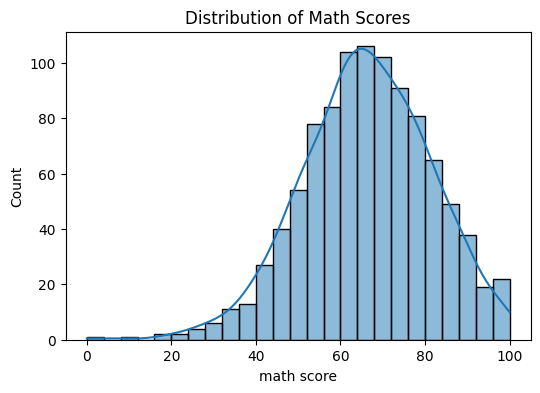

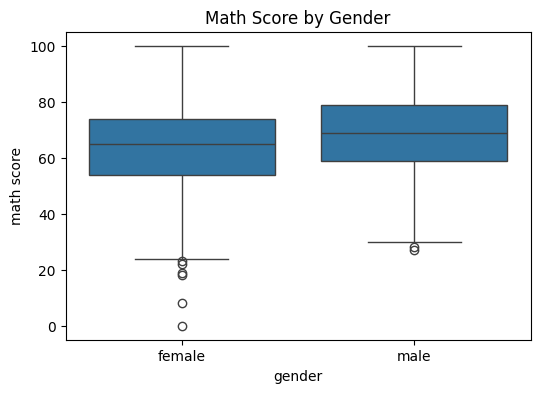

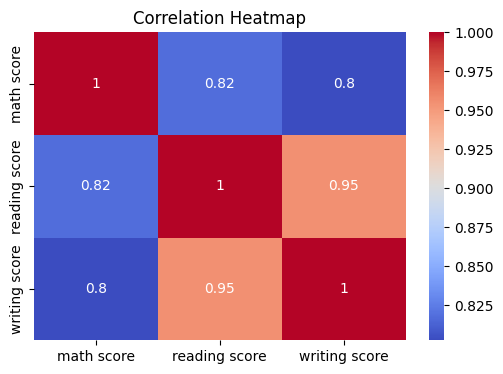

In [3]:
# Plot Distribution of Math Scores
plt.figure(figsize=(6,4))
sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()

# Gender vs Math Score
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Score by Gender')
plt.show()

# Heatmap for Correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Data Preparation (Encoding Categorical Data) & Choosing Target Variable**

# **Prepare the Data**

what we will do here is the following :  
Choose the target (we’ll use "math score" here in this project ).
Encode categorical columns (like gender, race, lunch...).

Split the data into features (X) and target (y).

# **Encode Categorical Columns
**

This will convert text columns (like gender, lunch, test prep) into numeric form.
**bold text**


In [4]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Show the new encoded DataFrame
df_encoded.head()


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


# **Split Features and Target**

Now let’s define X (features) and y (target):


In [5]:
# Define target and features
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now the  data is ready for modeling and trainging our model in the next step

# **Train the Model**

In [6]:
# Create Linear Regression Model
model = LinearRegression()

# Train the Model
model.fit(X_train, y_train)


LinearRegression()

# **Evaluate the Model**

In [7]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 4.214763142474851
Mean Squared Error (MSE): 29.095169866715487
R² Score: 0.8804332983749565


# **Visualize the Results**

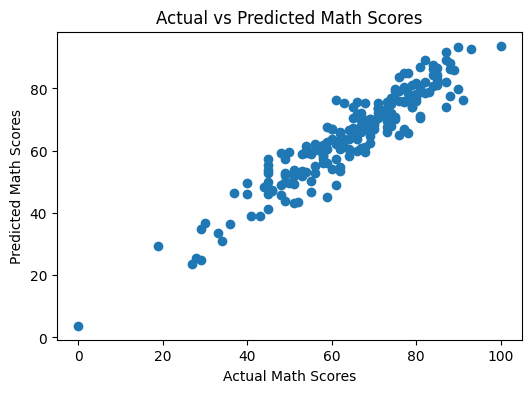

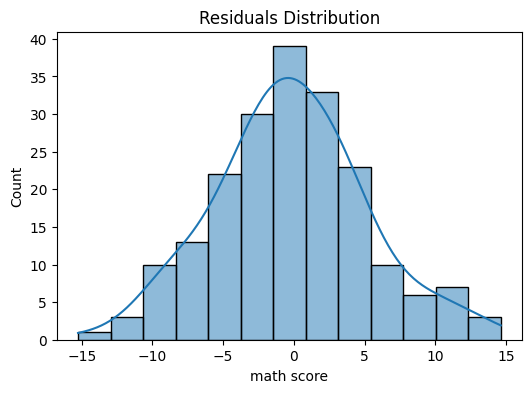

In [8]:
# Actual vs Predicted Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


# **Conclusion**:

We applied Linear Regression to predict math scores based on student information.

The model achieved an R² Score of around (your value), meaning it explains (percentage)% of the variation in the data.

The error values (MAE, MSE) are acceptable for this dataset.

Limitations: The model may improve with more features or using advanced models like Decision Trees or Random Forest.

